In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
#import dataframe
path=r'C:\\Users\\Admin\\London Uk Airbnb'

In [14]:
#This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [17]:
df = pd.read_csv(os.path.join(path, 'Prepared data', 'data_new.csv'))
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_6940\2477653558.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, 'Prepared data', 'data_new.csv'))


,Unnamed: 0,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,50,41870,Room in relaxed family house!,182993,NaN,Waltham Forest,51.558400,0.002580,Private room,37,2,2,2011-07-02,1,0,0
1,372,388306,"Garden flat, Putney",1942893,NaN,Wandsworth,51.460300,-0.220610,Private room,908,1,1,2012-03-26,1,365,0
2,66,306405,Spacious Double Room in East London,1575800,NaN,Barking and Dagenham,51.540720,0.152460,Private room,41,4,3,2012-05-27,1,365,0
3,435,390876,Peaceful Riverside Island Sanctuary,1954980,NaN,Richmond upon Thames,51.425720,-0.310030,Private room,35,3,3,2012-05-31,1,0,0
4,799,553543,Newly furnished flat in Kensington,2720301,NaN,Hammersmith and Fulham,51.490950,-0.206100,Private room,35,14,1,2012-07-17,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69346,69320,679489255469079962,LUXURY sky-high suite + RIVER + CITY SKYLINE v...,52259351,NaN,Lambeth,51.486185,-0.126897,Entire home/apt,315,1,0,NaN,14,365,0
69347,69329,44639074,Entire lovely family home with garden near London,17343987,NaN,Kingston upon Thames,51.383000,-0.326060,Entire home/apt,110,1,0,NaN,1,0,0
69348,69334,38338919,Loveshack baby!,5005089,NaN,Richmond upon Thames,51.446390,-0.324570,Entire home/apt,210,3,0,NaN,1,0,0
69349,69342,44197476,"Airy, sunlit, lovely apartment with Thames views",266785086,NaN,Tower Hamlets,51.508840,-0.036410,Private room,96,2,0,NaN,1,0,0


# 2.Data cleaning

In [18]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [32]:
df.head(20)

,Unnamed: 0,Id,Name,neighbourhood,Latidue,Longitude,Room_type,Price,Min_nights,Nr_of_reviews,Calculated_host_listings_count,Availability_365,Nr_of_reviews_ltm
0,50,41870,Room in relaxed family house!,Waltham Forest,51.55840,0.00258,Private room,37,2,2,1,0,0
1,372,388306,"Garden flat, Putney",Wandsworth,51.46030,-0.22061,Private room,908,1,1,1,365,0
2,66,306405,Spacious Double Room in East London,Barking and Dagenham,51.54072,0.15246,Private room,41,4,3,1,365,0
3,435,390876,Peaceful Riverside Island Sanctuary,Richmond upon Thames,51.42572,-0.31003,Private room,35,3,3,1,0,0
4,799,553543,Newly furnished flat in Kensington,Hammersmith and Fulham,51.49095,-0.20610,Private room,35,14,1,1,0,0
5,470,486501,Bright 2 Bed Flat by Queens Park,Brent,51.53368,-0.21200,Entire home/apt,65,4,1,1,0,0
6,147,230839,Spacious loft conversion - Hackney,Hackney,51.53680,-0.07753,Entire home/apt,90,7,4,1,0,0
7,816,556065,Self-contained artist's apartment,Hackney,51.53188,-0.07372,Entire home/apt,60,14,2,1,0,0
8,676,608929,Comfortable flat close to London fields,Hackney,51.53810,-0.05423,Private room,55,3,1,2,266,0
9,179,240734,"Stylish flat in Hackney, London",Hackney,51.57542,-0.06921,Entire home/apt,75,3,4,2,0,0


In [7]:
df.shape

(69351, 18)

In [33]:
# Rename the columns in the same way as in Exercise 6.2.

df.rename(columns = {'id' : 'Id', 'name': 'Name', 'host_id': 'Host_id', 'neighbourdood': 'Neighbourhood', 'latitude': 'Latidue', 'longitude' : 'Longitude', 'room_type' : 'Room_type','price':'Price', 'minimum_nights':'Min_nights', 'number_of_reviews':'Nr_of_reviews', 'last_review':'Last_review', 'calculated_host_listings_count':'Calculated_host_listings_count','availability_365':'Availability_365', 'number_of_reviews_ltm':'Nr_of_reviews_ltm' }, inplace = True)

In [20]:
#Missing values
# Check for missing values

df.isnull().sum()


Unnamed: 0                            0
Id                                    0
Name                                 21
Host_id                               0
neighbourhood_group               69351
neighbourhood                         0
Latidue                               0
Longitude                             0
Room_type                             0
Price                                 0
Min_nights                            0
Nr_of_reviews                         0
Last_review                       16780
Calculated_host_listings_count        0
Availability_365                      0
Nr_of_reviews_ltm                     0
dtype: int64

In [112]:
df

,Unnamed: 0,Id,Name,neighbourhood,Latidue,Longitude,Room_type,Price,Min_nights,Nr_of_reviews,Calculated_host_listings_count,Availability_365,Nr_of_reviews_ltm
0,50,41870,Room in relaxed family house!,Waltham Forest,51.558400,0.002580,Private room,37,2,2,1,0,0
1,372,388306,"Garden flat, Putney",Wandsworth,51.460300,-0.220610,Private room,908,1,1,1,365,0
2,66,306405,Spacious Double Room in East London,Barking and Dagenham,51.540720,0.152460,Private room,41,4,3,1,365,0
3,435,390876,Peaceful Riverside Island Sanctuary,Richmond upon Thames,51.425720,-0.310030,Private room,35,3,3,1,0,0
4,799,553543,Newly furnished flat in Kensington,Hammersmith and Fulham,51.490950,-0.206100,Private room,35,14,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69346,69320,679489255469079962,LUXURY sky-high suite + RIVER + CITY SKYLINE v...,Lambeth,51.486185,-0.126897,Entire home/apt,315,1,0,14,365,0
69347,69329,44639074,Entire lovely family home with garden near London,Kingston upon Thames,51.383000,-0.326060,Entire home/apt,110,1,0,1,0,0
69348,69334,38338919,Loveshack baby!,Richmond upon Thames,51.446390,-0.324570,Entire home/apt,210,3,0,1,0,0
69349,69342,44197476,"Airy, sunlit, lovely apartment with Thames views",Tower Hamlets,51.508840,-0.036410,Private room,96,2,0,1,0,0


In [22]:
dups = df.duplicated()

In [23]:
dups.shape (#No Dups)

(69351,)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

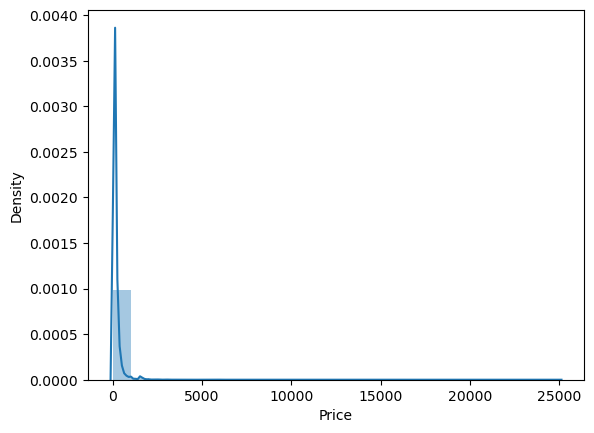

In [24]:
#Extreme values checks
sns.distplot(df['Price'], bins=25) # Shows extreme values

In [26]:
df['Price'].mean()

177.20882179060143

In [27]:
df['Price'].median() # Check the median

100.0

In [28]:
df['Price'].max() # Check the max

25000

In [50]:
df.describe()

,Unnamed: 0,Id,Latidue,Longitude,Price,Min_nights,Nr_of_reviews,Calculated_host_listings_count,Availability_365,Nr_of_reviews_ltm
count,69351.000000,6.935100e+04,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000
mean,34675.000000,1.373703e+17,51.509544,-0.128489,177.208822,5.997505,17.537051,11.987498,108.520266,4.734438
std,20020.053596,2.651479e+17,0.049182,0.100957,412.823024,25.709514,40.410763,37.148839,132.821088,12.032502
min,0.000000,1.391300e+04,51.272480,-0.523600,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,17337.500000,1.810090e+07,51.483140,-0.189520,55.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,34675.000000,3.395467e+07,51.513600,-0.126200,100.000000,2.000000,4.000000,1.000000,32.000000,0.000000
75%,52012.500000,5.265645e+07,51.539710,-0.068550,180.000000,4.000000,16.000000,4.000000,228.000000,5.000000
max,69350.000000,7.123951e+17,51.708930,0.305150,25000.000000,1125.000000,1141.000000,285.000000,365.000000,660.000000


In [ ]:
#3.Data prep for regression analysis 

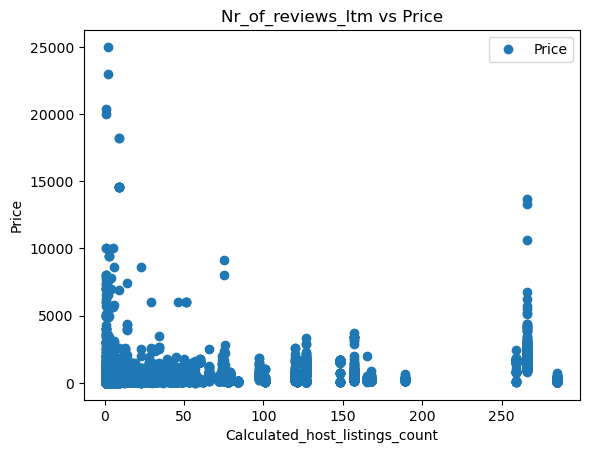

In [90]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Calculated_host_listings_count', y='Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Nr_of_reviews_ltm vs Price')  
plt.xlabel('Calculated_host_listings_count')  
plt.ylabel('Price')  
plt.show()

In [92]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Calculated_host_listings_count'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

In [93]:
X

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [94]:
y

array([[ 37],
       [908],
       [ 41],
       ...,
       [210],
       [ 96],
       [ 29]], dtype=int64)

In [95]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#4Regression analysis

In [96]:
# Create a regression object.

regression = LinearRegression()

In [97]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [98]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

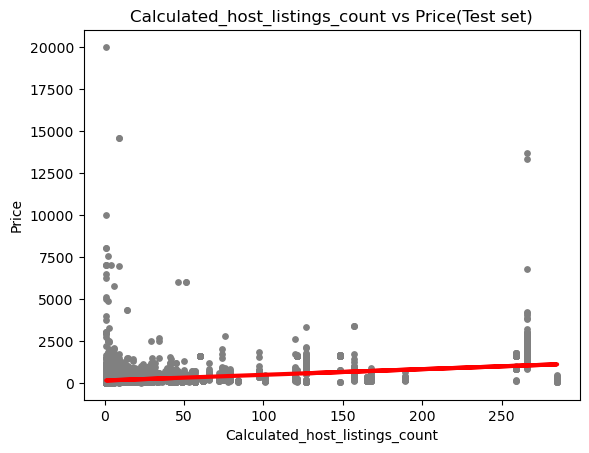

In [108]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Calculated_host_listings_count vs Price(Test set)')
plot_test.xlabel('Calculated_host_listings_count')
plot_test.ylabel('Price')
plot_test.show()

In [100]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [101]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.37017293]]
Mean squared error:  144041.37988218613
R2 score:  0.11641739475033897


In [102]:
y_predicted

array([[278.3388148 ],
       [214.30552919],
       [143.53189773],
       ...,
       [146.90207066],
       [140.1617248 ],
       [564.80351356]])

In [103]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,850,278.338815
1,210,214.305529
2,48,143.531898
3,75,140.161725
4,169,140.161725
5,80,140.161725
6,49,140.161725
7,1330,1033.257550
8,85,160.382762
9,26,140.161725


#Compare how the regression fits the training set

In [104]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [105]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [106]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.37017293]]
Mean squared error:  158076.19530496377
R2 score:  0.08938045750695534


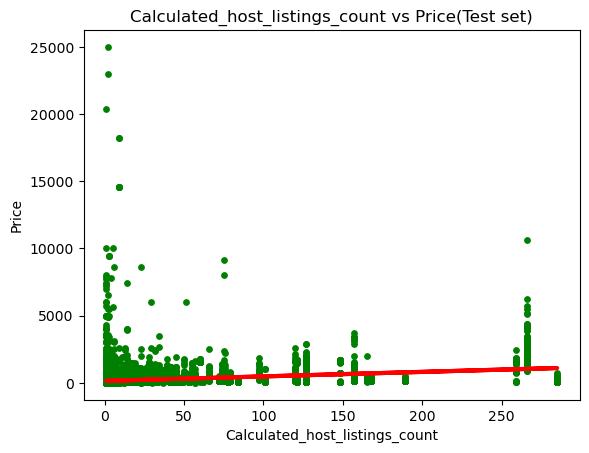

In [107]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Calculated_host_listings_count vs Price(Test set)')
plot_test.xlabel('Calculated_host_listings_count')
plot_test.ylabel('Price')
plot_test.show()

#The models outcome on the training set is very similar to that on the test set.  With the MSE being even larger on the train set.  Confirming that this is not a good model to use.  This proves that the original retail price is not the driving factor of sale price. 